<a href="https://colab.research.google.com/github/MarcoAPe/Data_Science_Projects/blob/main/Proyecto_M4_Modelado_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# Acciones previas:
1. Importar bibliotecas
2. Montar contenido de drive
3. Importar funciones de análisis
4. Cargar bases de datos

In [ ]:
# Importar bibliotecas:

# EDA
import numpy                        as np
import pandas                       as pd
import matplotlib.pyplot            as plt
import seaborn                      as sns
# Preprocesado
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.decomposition   import PCA
from yellowbrick.cluster     import KElbowVisualizer
from sklearn.model_selection import train_test_split, cross_val_predict
import scipy.cluster.hierarchy      as shc
from sklearn.cluster         import AgglomerativeClustering
# Modelado
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.cluster         import KMeans
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.metrics         import mean_absolute_error
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score
from sklearn.metrics         import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
# Scoring
from sklearn.datasets        import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import silhouette_score

In [ ]:
# Montar archivo en drive de Google:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar funciones propias:

%run '/content/drive/MyDrive/Colab Notebooks/MyFunctions.ipynb'

In [ ]:
# Cargar archivo de estudio:

raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M4/Proyecto/costumers.csv')
raw

# Parece que el tipo de dato es adecuado para cada columna, se corroborará con un .info()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0
...,...,...,...,...,...,...
495,9065.13,0,1,42479.96,0.0,0
496,13175.69,1,0,100968.56,19.3,1
497,15004.61,0,1,7726.65,0.0,0
498,17148.91,1,0,30516.46,0.0,1


In [ ]:
# Cargar archivo de prueba:

cooked = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M4/Proyecto/new_costumer.csv')
cooked.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


# Análisis exploratorio
Definir acciones a realizar a partir de las características de los datos

In [ ]:
# Realizar EDA:

raw.info()

# No es necesario imputar
# No es necesario clasificar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [ ]:
# Verificar balance de clases:

print(raw['Credito_tipo_1'].value_counts())
print(raw['Credito_tipo_2'].value_counts())

# No será necesario realizar balance de cargas

1    305
0    195
Name: Credito_tipo_1, dtype: int64
0    271
1    229
Name: Credito_tipo_2, dtype: int64


In [ ]:
raw.describe()

# Se encontró un dato no coherente en los salarios. Se eliminará.

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [ ]:
raw[raw['Salario'] < 0]

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
472,-2911.65,1,1,86358.8,0.0,1


In [ ]:
raw.drop(472, inplace = True)

In [ ]:
raw[raw['Limite_TC'] < 0]

# Aunque me parece extraño, parece que los créditos negativos significan algo, quiero pensar que deuda, de modo que no se eliminarán.

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
47,24295.71,1,0,-2716.47,0.0,0
79,24592.73,1,0,-5897.92,0.0,0
91,30041.40,1,0,-1337.42,0.0,0
133,17400.43,0,1,-22182.75,0.0,0
184,7823.26,0,1,-14786.24,0.0,0
210,15035.73,0,1,-19952.85,0.0,0
212,8896.39,1,0,-5148.28,0.0,0
228,16321.80,0,0,-262.59,0.0,0
235,9445.21,0,1,-4748.86,0.0,1
341,20895.92,0,1,-13930.96,0.0,0


In [ ]:
raw.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000
mean,12119.158998,0.609218,0.456914,44701.23984,4.335671,0.601202
std,5084.511833,0.488415,0.498640,22094.59273,4.785643,0.490142
min,18.110000,0.000000,0.000000,-22207.95000,0.000000,0.000000
25%,8543.830000,0.000000,0.000000,30095.55000,0.000000,0.000000
50%,11444.330000,1.000000,0.000000,47951.82000,0.000000,1.000000
75%,15174.555000,1.000000,1.000000,59057.28500,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.82000,19.300000,1.000000


# Análisis de componentes principales

<Axes: xlabel='0', ylabel='1'>

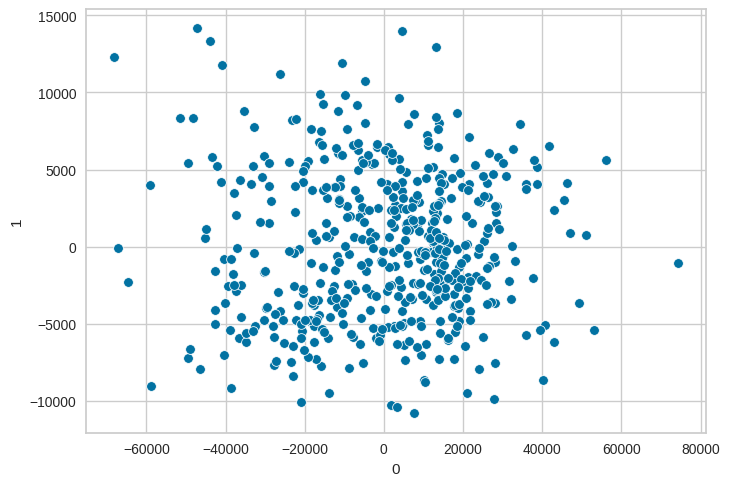

In [ ]:
# Convertir dataframe hexadimensional a bidimensional mediante análisis de componentes principales:

pca = PCA(2)
df_pca = pd.DataFrame(pca.fit_transform(raw))

# Visualizar mediante gráfico de dispersión:

sns.scatterplot(data = df_pca, x = 0, y = 1)

# Es difícil visualizar la cantidad de clusters pero por lo menos existirán más de 3, según mi percepción

# KMeans
1. Método del codo
2. Diseño del modelo
3. Visualización de clases creadas a partir de KMeans

## 1. Método del codo para cantidad óptima de clústers

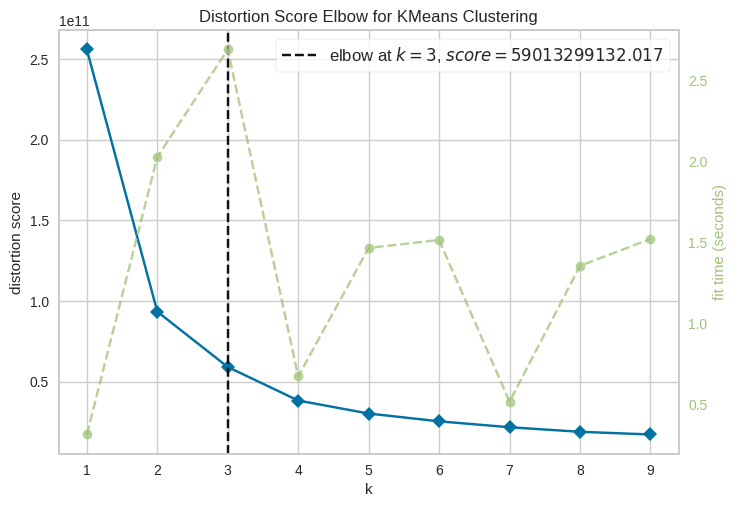

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Método del codo:

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(raw)
visualizer.show()

# Parece ser que el número de clusters óptimo para el método de KMeans es de tres

## 2. Diseño del modelo

In [ ]:
# Diseño del método de KMeans para el dataset:

kmeans = KMeans(n_clusters = 3,  init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(raw)
df_pca['KMeans'] = y_kmeans
np.unique(y_kmeans, return_counts= True)

(array([0, 1, 2], dtype=int32), array([195,  96, 208]))

## 3. Visualización de clases

<Axes: xlabel='0', ylabel='1'>

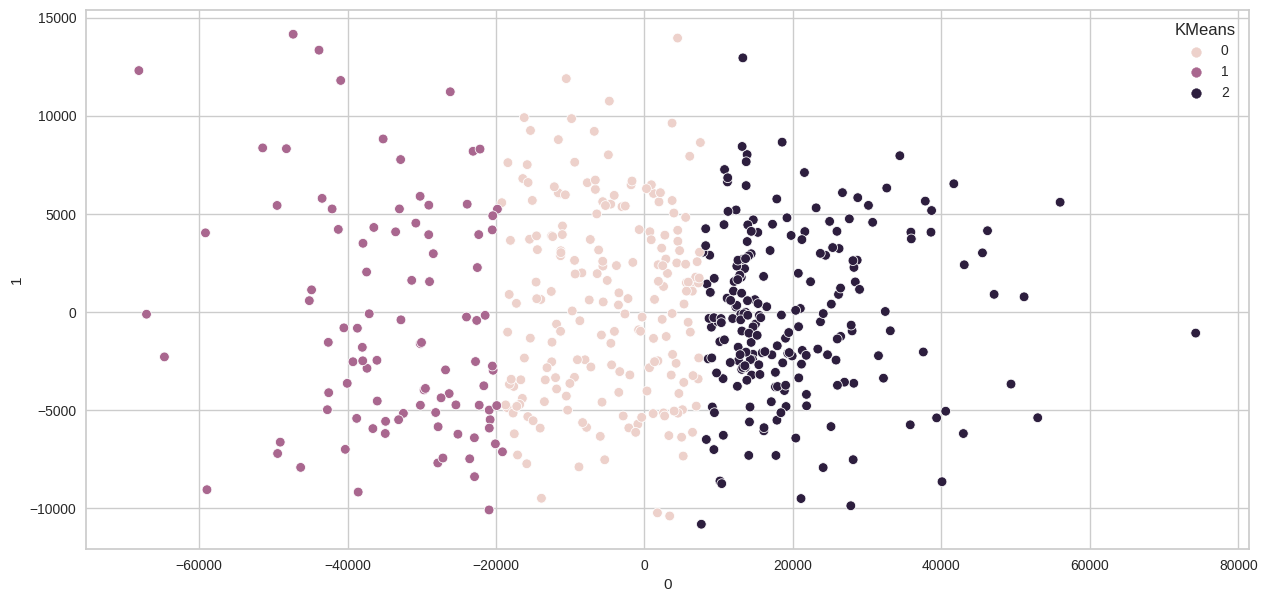

In [ ]:
# Visualización de clases creadas por KMeans

plt.figure(figsize = (15,7))
sns.scatterplot(data = df_pca, x = 0, y = 1, hue = 'KMeans')

# Hierarchichal Clustering
1. Dendograma
2. Diseño del modelo
3. Visualización de clases creadas a partir de Hierarchichal Clustering

## 1. Método del dendograma para cantidad óptima de clústers

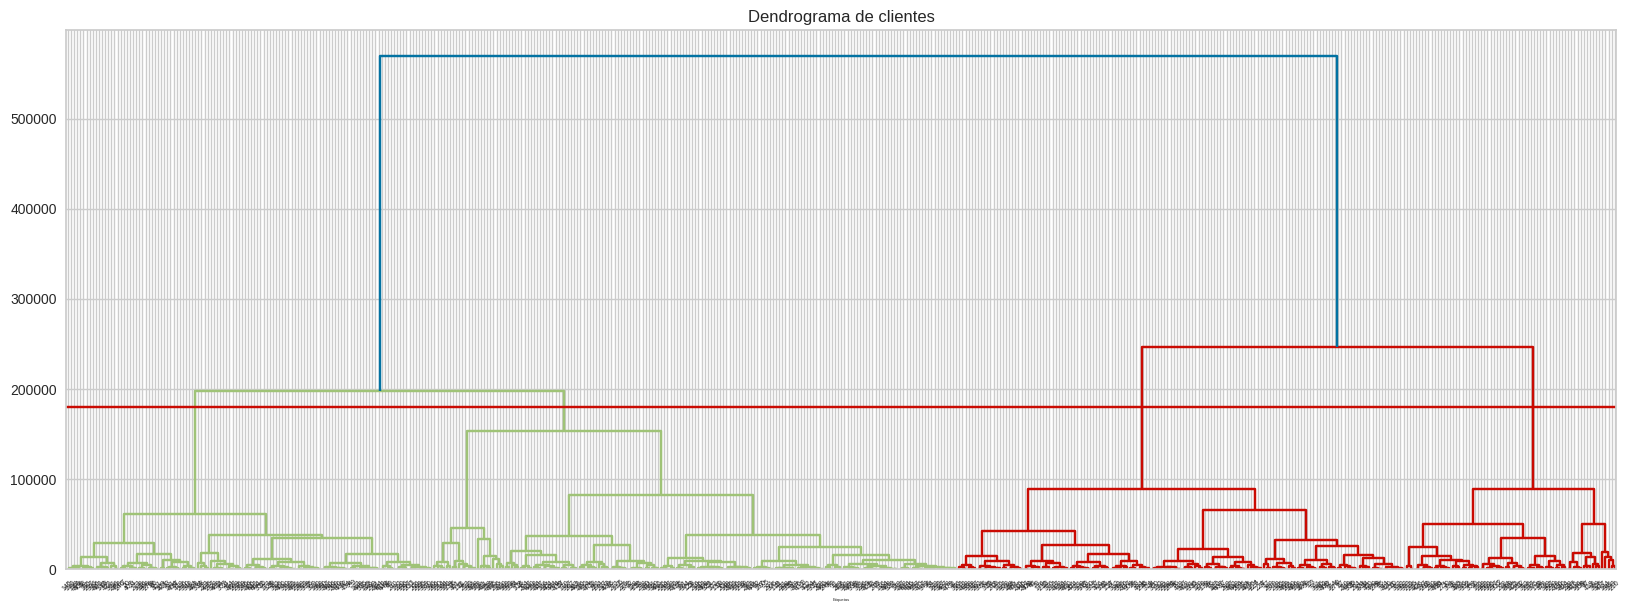

In [ ]:
# Dendograma:

plt.figure(figsize=(20, 7))
plt.title("Dendrograma de clientes")
clusters = shc.linkage(raw, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 180000, color = 'r', linestyle = '-')
plt.xlabel("Etiquetas", fontsize=3)
plt.xticks(rotation=45)
plt.show()

# Aparentemente la cantidad óptima de clústers es de cuatro

## 2. Diseño del modelo

In [ ]:
# Diseño del modelo de AgglomerativeClustering:

hc = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(raw)
df_pca['HClust'] = y_hc
np.unique(y_hc, return_counts= True)

(array([0, 1, 2, 3]), array([169,  68, 144, 118]))

## 3. Visualización de clases

<Axes: xlabel='0', ylabel='1'>

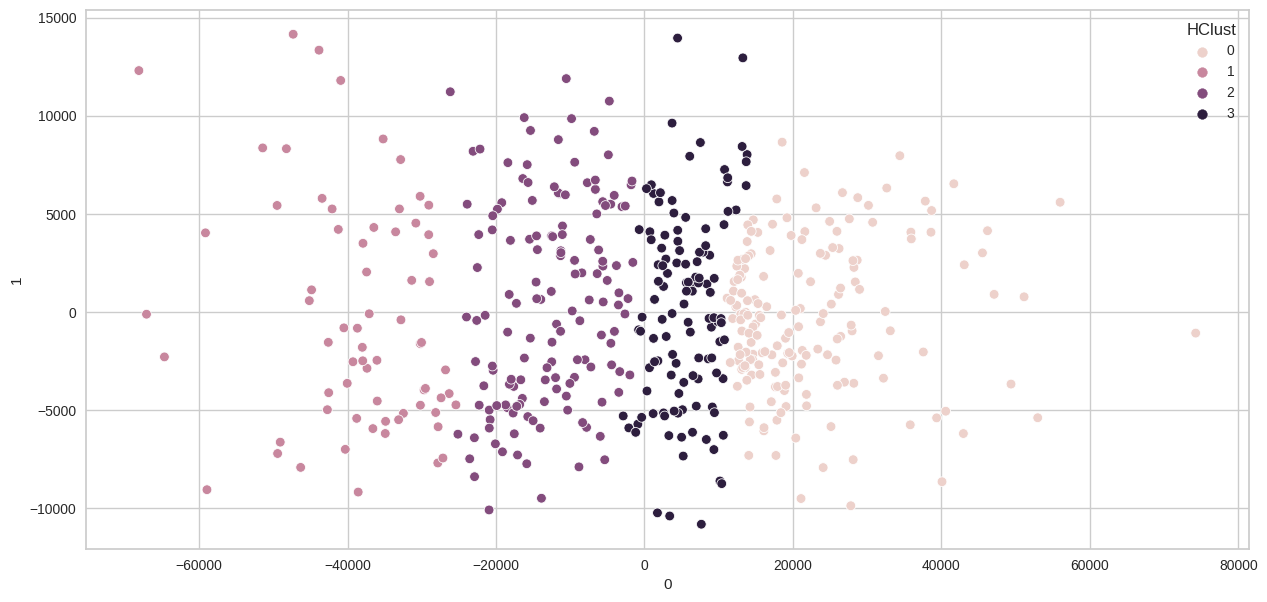

In [ ]:
# Visualización de clases creadas por KMeans

plt.figure(figsize = (15,7))
sns.scatterplot(data = df_pca, x = 0, y = 1, hue = 'HClust')

# Análisis de métricas

In [ ]:
"""# Importamos las bibliotecas
from numpy import array
from sklearn.model_selection import KFold

# Generamos nuestra muestra de datos
data = array([1, 2, 3, 4, 5, 6])

# Preparamos la validación cruzada
kfold = KFold(n_splits=3, random_state=1, shuffle=True)

# Enumeramos los dobleces
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

# Importamos las bibliotecas
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score

# Definimos el dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Imprimimos el dataset
print(X.shape, y.shape)

# Preparamos el proceso de validación k-fold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# Creamos el modelo de regresión logística
model = LogisticRegression()
# Evaluamos el modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Imprimimos el rendimiento
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Importamos las bibliotecas
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Función que crea el dataset
def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# Devuelve el modelo a evaluar
def get_model():
	model = LogisticRegression()
	return model

# Devuelve las puntuaciones de evaluación del modelo
def evaluate_model(cv):
	# Obtenemos el dataset
	X, y = get_dataset()
	# Obtenemos el modelo
	model = get_model()
	# Evaluamos el modelo con cross validation
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# Devolvemos las puntuaciones
	return mean(scores), scores.min(), scores.max()

# Calcular las conduciones ideales de test
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

folds = range(2,31)
 # Registramos la media y el mínimo/máximo de cada conjunto de resultados
means, mins, maxs = list(),list(),list()
# Evaluamos cada valor k
for k in folds:
	# Definimos las condiciones del test
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# Evaluamos el valor de k
	k_mean, k_min, k_max = evaluate_model(cv)
	# Imprimimos el rendimiento
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# Guardamos la media de la precisión
	means.append(k_mean)
  # Guardamos mínimo y máximo en relación con la media
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

# Diagrama de línea de k valores medios con barras de error mínimo/máximo
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# Graficamos el caso ideal en un color diferente
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# Mostramos la gráfica
pyplot.show()

 # Importamos las bibliotecas necesarias
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Obtenemos una lista de los modelos a evaluar
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

# Evaluamos el modelo con la condición dada
def evaluate_model(cv, model):
	# Obtenemos el dataset
	X, y = get_dataset()
	# Evaluamos el modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# Devolvemos los resultados
	return mean(scores)

# Definimos las condiciones de test
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Obtenemos la lista de modelos a considerar
models = get_models()
# Obtenemos los resultados
ideal_results, cv_results = list(), list()
# Evaluamos cada modelo
for model in models:
  # Evaluamos el modelo usado para cada condición de prueba
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# Revisamos resultados no válidos
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# Guardamos resultados
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# Imprimimos el progreso de nuestra evaluación
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

# Calculamos la coorelación entre cada condición de test
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)

# Generamos el diagrama de dispersión
pyplot.scatter(cv_results, ideal_results)
# Trazamos la línea para el mejor ajuste
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# Mostramos la gráfica
pyplot.show()

# Importamos las bibliotecas
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics

# Cargamos un dataset de muestra y hacemos una clusterización por k-means en el
X, y = datasets.load_iris(return_X_y=True)
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_

# Generamos los scores
Silueta = metrics.silhouette_score(X, labels)

Calinski_Harabasz = metrics.calinski_harabasz_score(X, labels)
Davies_Bouldin = metrics.davies_bouldin_score(X, labels)

 # Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)"""

'# Importamos las bibliotecas\nfrom numpy import array\nfrom sklearn.model_selection import KFold\n\n# Generamos nuestra muestra de datos\ndata = array([1, 2, 3, 4, 5, 6])\n\n# Preparamos la validación cruzada\nkfold = KFold(n_splits=3, random_state=1, shuffle=True)\n\n# Enumeramos los dobleces\nfor train, test in kfold.split(data):\n\tprint(\'train: %s, test: %s\' % (data[train], data[test]))\n\n# Importamos las bibliotecas\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import silhouette_score\n\n# Definimos el dataset\nX, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)\n\n# Imprimimos el dataset\nprint(X.shape, y.shape)\n\n# Preparamos el proceso de validación k-fold\ncv = KFold(n_splits=10, random_state=1, shuff

# Testing
1. Prueba de modelo con base de datos
2. Visualización de resultados

# Presentación de resultados
1. Elección del número de clústers
2. Conclusiones finales

Dado que la elección de la cantidad de clústers quedó en 4 categorías, se realizará un análisis de la relación que existe entre estas categorías y las características del tipo de cliente.

In [ ]:
# Inserción de nuevo atributo encontrado a partir del modelado, en base de datos original:

df = pd.DataFrame(raw)
df['Tipo_cliente'] = y_hc

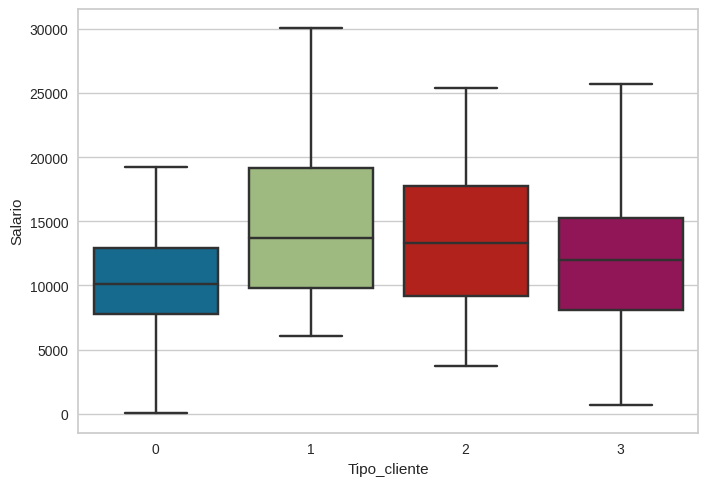

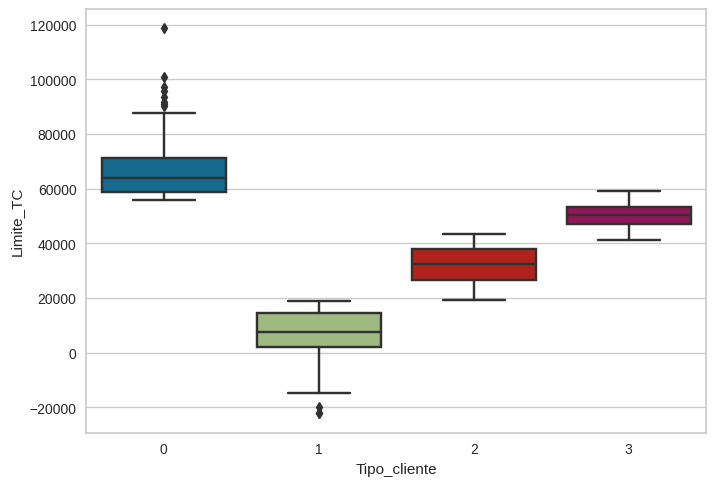

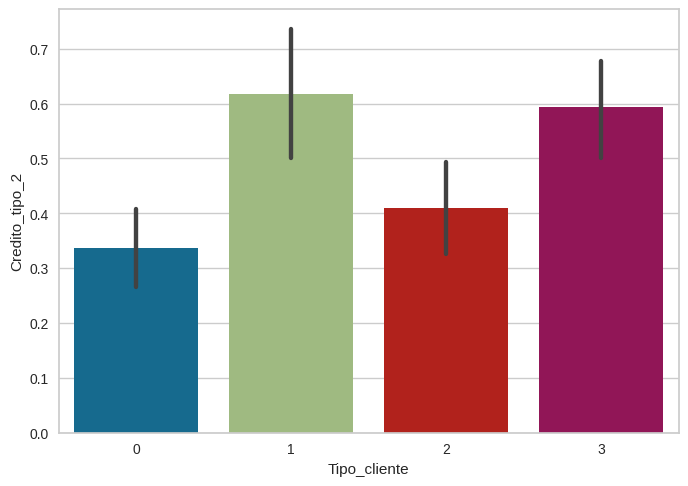

<Axes: xlabel='Tipo_cliente', ylabel='Credito_tipo_1'>

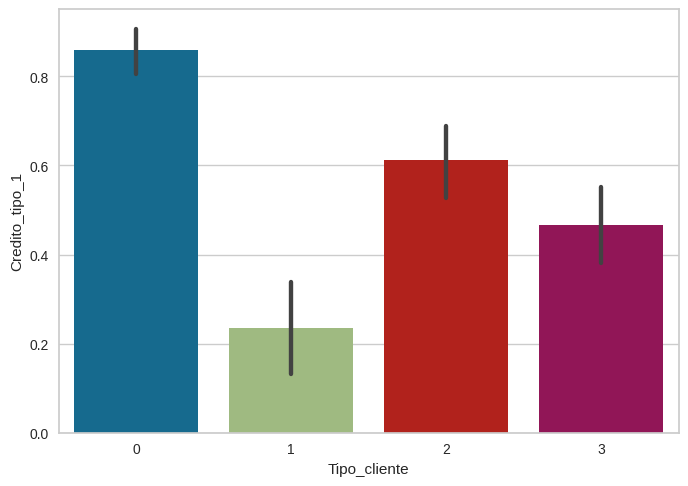

In [ ]:
# Análisis de correlación de atributos

sns.boxplot(data = df, x = 'Tipo_cliente', y = 'Salario')
plt.show()
sns.boxplot(data = df, x = 'Tipo_cliente', y = 'Limite_TC')
plt.show()
sns.barplot(data = df, x = 'Tipo_cliente', y = 'Credito_tipo_2')
plt.show()
sns.barplot(data = df, x = 'Tipo_cliente', y = 'Credito_tipo_1')

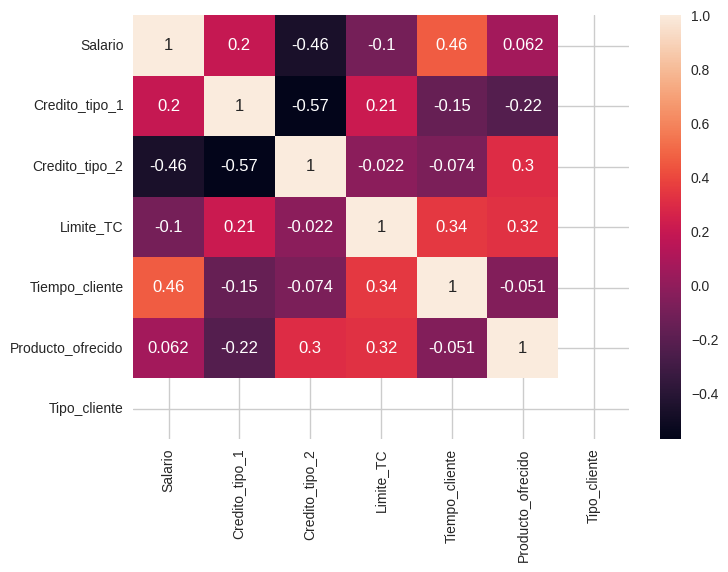

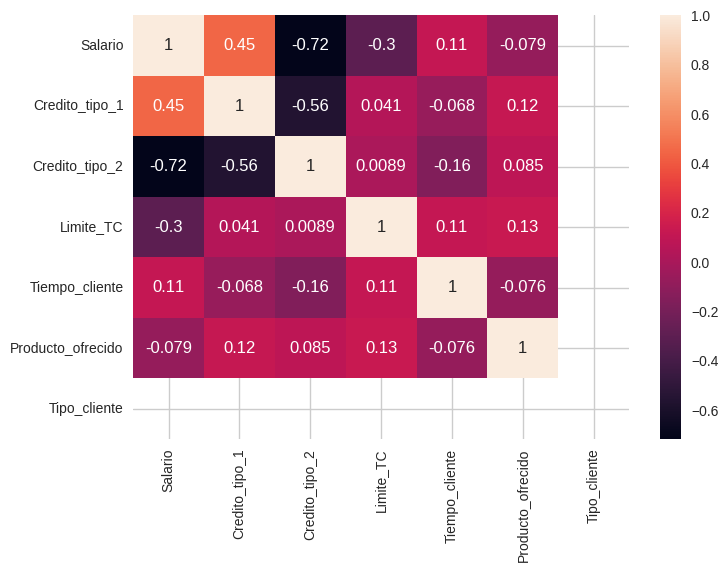

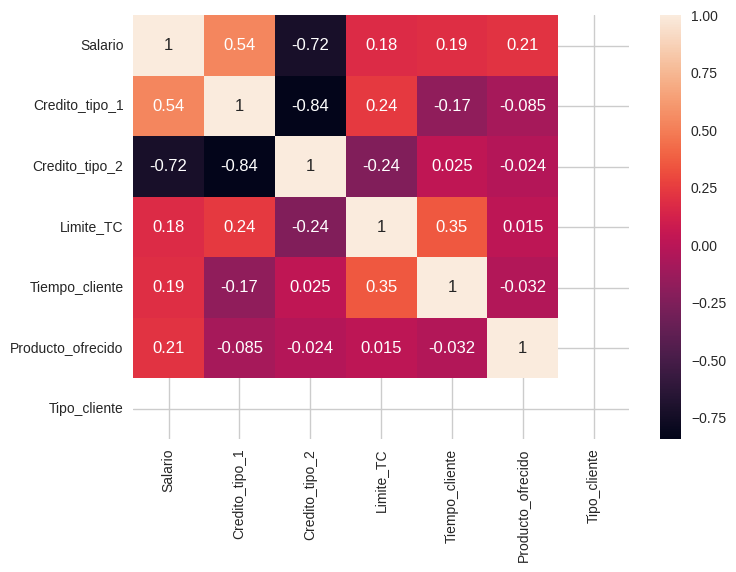

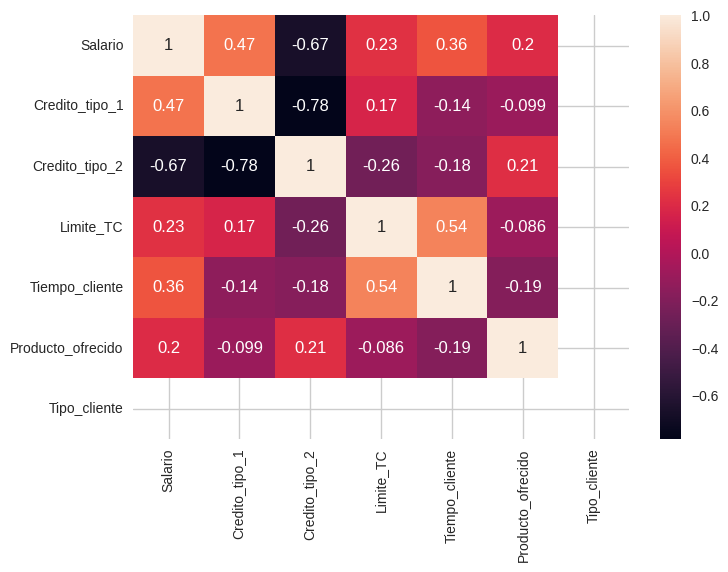

In [ ]:
for i in range(0,4):
  sns.heatmap(df[df['Tipo_cliente'] == i].corr(), annot = True)
  plt.show()

In [ ]:
for i in range(0,4):
  print(df[df['Tipo_cliente'] == i]['Producto_ofrecido'].value_counts())

1    111
0     58
Name: Producto_ofrecido, dtype: int64
0    49
1    19
Name: Producto_ofrecido, dtype: int64
1    85
0    59
Name: Producto_ofrecido, dtype: int64
1    85
0    33
Name: Producto_ofrecido, dtype: int64


## 1. Elección del modelo

El análisis de la base de datos que usted nos proporcionó demostró que la opción más inteligente es categorizar a los clientes en cuatro distintos grupos. Para realizar un enfoque más objetivo atendimos a la correlación entre la lealtad y el límite en su crédito diferenciado por el tipo de cliente, ya que encontramos que es difícil identificarlos por su sueldo. Asociamos entonces estos parámetros a la posible adquisición de su nuevo producto. Como resultado, los clientes tipo 1, 3 y 4 comprenden aquellos usuarios que podrían estar interesados en el producto pues llevan tiempo siendo socios y tienen cierta capacidad económica, sin embargo entre estos, aquellos que no recibieron la oferta del producto fueron los del grupo 4, son entonces estos la mejor opción de inversión en relación a la promoción del proyecto.

In [ ]:
# Cantidad de clientes con producto ofertado, diferenciado por tipo de cliente

df.groupby('Tipo_cliente')['Producto_ofrecido'].std()

Tipo_cliente
0    0.476187
1    0.452046
2    0.493499
3    0.450747
Name: Producto_ofrecido, dtype: float64